In [160]:
#Useful imports 
import time
time_duration = 0.5
import requests
from bs4 import BeautifulSoup

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl

import seaborn as sn


pd.options.display.max_columns = 500

In [161]:
df =pd.read_csv('datacleaned.csv')

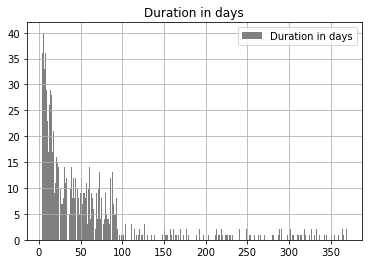

In [162]:
plt=df.hist(column='Duration in days', bins=400, legend=True, color='grey');

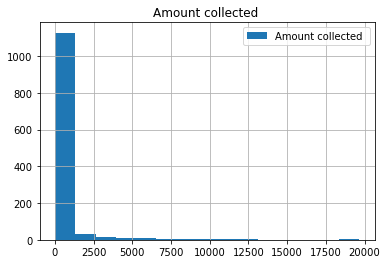

In [163]:
plt=df.hist(column='Amount collected ', bins=15, legend= True);

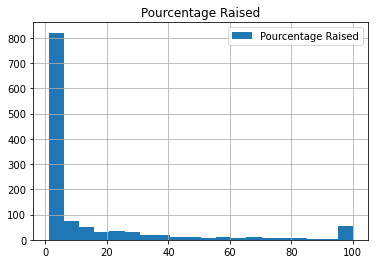

In [164]:
plt=df.hist(column='Pourcentage Raised', bins=20, legend= True);

<AxesSubplot:title={'center':'Means of duration'}, xlabel='Categorie'>

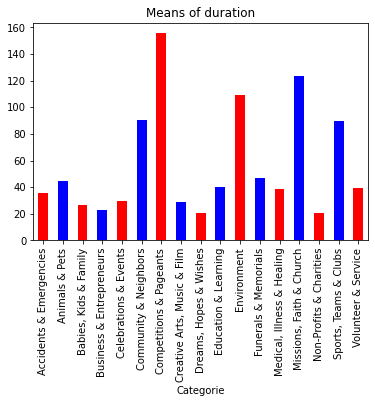

In [165]:
df.groupby('Categorie')['Duration in days'].mean().plot.bar( color=['r','b'],title='Means of duration')

<AxesSubplot:title={'center':'Means of amount collected'}, xlabel='Categorie'>

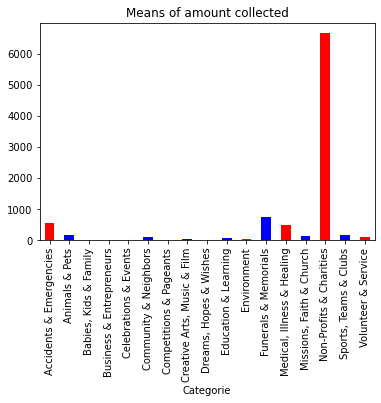

In [166]:
df.groupby('Categorie')['Amount collected '].mean().plot.bar(color=['r','b'],title='Means of amount collected')

<AxesSubplot:title={'center':'Means of amount collected'}, xlabel='Categorie'>

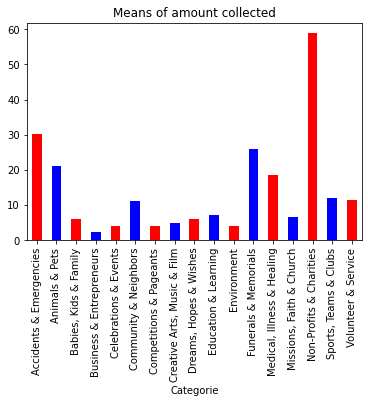

In [167]:
df.groupby('Categorie')['Pourcentage Raised'].mean().plot.bar(color=['r','b'],title='Means of amount collected')

<b> III.4.1/ We make a dictionnary of keywords for each category we will use to study descriptions

In [168]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/albandhauthuille/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [169]:
catégorie = ["Medical, Illness & Healing", "Funerals & Memorials", "Accidents & Emergencies","Non-Profits & Charities","Education & Learning", "Animals & Pets", "Environment", "Business & Entrepreneurs","Community & Neighbors", "Competitions & Pageants","Creative Arts, Music & Film", "Celebrations & Events","Missions, Faith & Church", "Babies, Kids & Family", "Sports, Teams & Clubs", "Travel & Adventure","Volunteer & Service", "Dreams, Hopes & Wishes", "Other"]


#We look at the words with the biggest occurences for each category (open 'occurences' file )
from collections import Counter
txt=[]
for cat in catégorie:
    list1=[]
    for e in df.loc[(df['Categorie'] ==cat)]['Short_description']:
        list1=list1+word_tokenize(e)
    counts = Counter(list1)
    txt.append(cat)
    txt.append("      ")
    txt.append(counts)


with open('occurences.txt', 'w') as f:
    for item in txt:
        f.write("%s\n" % item)

In [170]:
#We list the words of occurences that are keywords, which means the ones with a signification linked with the category

motsclés1=[[' douleur, association, funds, générosité, surgery, financier, remercie, disease, cancer, traitements, opération, besoin,enfant, mère '], 
[' family, obsèques, children, soutien, remercie, enterrement, hopital, association, community, maman '],
[' typhon, community, home, treatment, soutien, reconstruire, destroyed, maison, father, famille '],
[' support, community, together, children, foundation, students, animal, organization, cause, education, property, building '],
[' school, France, children, formation, yhèse, étude, construction, association, classe, famille '],
[' vétérinaire, opération, chien, frais, traitements, sauver, chimiothérapie, chat, examens, chevaux '],
[ ' association, environnement, société, développement, qualité, paris, climate, change, sensibiliser, scientifique, électricité »'],
[' agricole, communication, restaurant, investissement, agriculture, business, social, objectif, activité, professionnelle '],
[' vaccination, family, community, water, business, needs, health '],
[' compétition, championnat, international, opportunity, formation, passion, métrage, vidéo, réalisation, training ' ],
[ ' association, computer, vidéo, ordinateur, album, montage, formation, documentary ' ],
[ ' festival, conference, transpersonnalité, musique, climate, justice, agreement, anniversaire '],
[ ' mission, community, christ, church, évangélisation, voyage, prayer, christians, orphanages '],
[ ' famille, maison, besoin, place, cancer, association, logement, travaux, children ' ],
[ ' coach, tennis, equipments, soccer, Olympic, academy, club, basketball, soccer, volleyball, ironman ' ],
[ ' voyage, dream, equipment, découvrir, trail, aventure, vidéo, professionnelle, birthday ' ],
[ ' enfants, villages, typhon, association, education, maisons, acheter, christmas, nourrir ' ],
[ ' refugee, voyage, meditation, pédagogique, besoin, school, program '],
[]
          ]
motsclés=[]

for e in motsclés1:
    motsclés.append(word_tokenize(str(e).replace(',','').replace('[','').replace(']','').replace('"','').replace("'" ,'')))
    

In [171]:
#We create a dictionnary linking a category and the keywords linked with it
motclé_dict=dict()
#catégorie is defined in II.8/
for i in range(len(catégorie)):
    motclé_dict[catégorie[i]]=motsclés[i]
    
#We create a dictionnary linking a category and its number
dict_category=dict()
#catégorie is defined in II.8/
for i in range(len(catégorie)):
    dict_category[i]=catégorie[i]

In [172]:
#This function counts the occurences of the words of a list1 in another list2.
def countword(list1, list2):
    occu=dict()
    for word in list1:
        #print(word)
        occu[word]=list2.count(word)
    return occu



In [173]:
#This function counts the numbers of matching words from the description (list1) with the keywords of the category(list2)
def scoreWord(index):
    sum=0
    count=countword(motclé_dict[df['Categorie'][index]],df['Short_description'][index])
    for e in count:
        sum+=count[e]
    return sum 

#We create a column scoreword
scoreword=[]
for i in range(len(df['Short_description'])):
    scoreword.append(int(scoreWord(i)))
df['ScoreWord']=scoreword

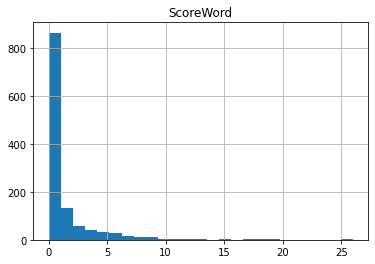

In [174]:
plt=df.hist(column='ScoreWord', bins=25)


<b> OLS ANALYSIS

In [180]:
import seaborn as sn
import statsmodels.api as sm

def OLS_per_category(cat,covariates):
    df2=df.loc[df['Categorie']==cat]

    #drop 4th quartile of highest values
    df2=df2.loc[df2['Amount collected ']<df2['Amount collected '].describe()[6]]
    
    #Create columns "description contains or not the keyword"
    for keyword in motclé_dict[cat]:
        list=[]
        for collect_description in df2['Short_description']:
            if keyword in collect_description:
                list.append(1)
            else:
                list.append(0)
        df2[keyword]=list
    
    #Create columns categories:
    '''for cat2 in catégorie:
        list=[]
        for categ in df2['Categorie']:
            if categ==cat2:
                list.append(1)
            else:
                list.append(0)
        df2[cat2]=list'''
    
    plt.subplots(2, 3, figsize=(24, 10))    
    corrMatrix = df2[covariates+motclé_dict[cat]].corr()
    sn.heatmap(corrMatrix, annot=True, square=True).set_title("Correlation matrix of the principal variables")
    #OLS
    X = df2[covariates]
    #X = df2[['ScoreWord','Duration in days']+(motclé_dict[cat])]

    Y=df2['Amount collected ']

    model = sm.OLS(Y, X)
    results = model.fit()
    #print(results.params)
    
    
    fig, ax = plt.subplots()
    
    fig = sm.graphics.plot_fit(results, 0, ax=ax)
    ax.set_ylabel("Murder Rate")
    ax.set_xlabel("ScoreWord")
    ax.set_title("Amount collected")
    
    print(results.summary())

In [181]:
OLS_per_category(dict_category[2],['Duration in days'])

'''for i in range(5):
    print(dict_category[i])
    OLS_per_category(dict_category[i],['Duration in days'])
    print('/n')'''

AttributeError: 'numpy.ndarray' object has no attribute 'subplots'

In [177]:
import seaborn as sn

plt.figure(figsize=(15,15))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True, square=True).set_title("Correlation matrix of the principal variables")


AttributeError: 'numpy.ndarray' object has no attribute 'figure'